In [9]:
import numpy as np
import pandas as pd
import random
import json

In [10]:
rev = []
with open('Software_5.json') as f:
  for line in f:
    rev.append(json.loads(line))

#main dataframe
test = pd.DataFrame(columns=['Summary and Review', 'Rating'])

#adding data into dataframe 
for i in range(len(rev)):
    if('overall' in rev[i] and 'reviewText' in rev[i] and 'summary' in rev[i]):
        test.loc[i] = [rev[i]['summary'] + ' ' + rev[i]['reviewText'], rev[i]['overall']]
#function to turn ratings into two class
def rate(x):
    if(x>3):
        return 1
    elif(x<3):
        return 0
    else:
        return random.randint(0,1)
test['Rating'] = test['Rating'].apply(rate)
import re
def removeNum(x):
    x = re.sub(r'[0-9]+|_', '', x)
    x = " . ".join(x.split('.')).split()
    from nltk.sentiment.util import mark_negation
    x = mark_negation(x)
    x = " ".join(x)
    return x
test['Summary and Review'] = test['Summary and Review'].apply(removeNum)

In [11]:
rev[0]
test

,Summary and Review,Rating
0,A solid overview of Dreamweaver CS I've been u...,1
1,A good value The demo is done with the PC vers...,1
2,This is excellent software for those who want ...,1
3,A Fantastic Overview of Dream Weaver and Web D...,1
4,Excellent Tutorials! I decided (after trying a...,1
...,...,...
12800,File Management Software with Basic Editing Ca...,1
12801,"Might not be_NEG for_NEG the_NEG ""novice""_NEG ...",0
12802,"Great, Inexpensive Software for Those Who Have...",1
12803,Gets the job done . . . but not as_NEG easy_NE...,1


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token= RegexpTokenizer(r'\w+')

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_t2 = tfidf.fit_transform(test['Summary and Review'])

cvector = CountVectorizer(stop_words='english', ngram_range=(1,1))
text_t = cvector.fit_transform(test['Summary and Review'])

In [57]:
len(cvector.get_feature_names())

34770

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_t, test['Rating'], test_size=0.25, random_state=5)

In [59]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#from sklearn.naive_bayes import BernoulliNB
#BNB = BernoulliNB()
#BNB.fit(X_train, Y_train)


#from sklearn.naive_bayes import GaussianNB
#GNB = GaussianNB()
#GNB.fit(X_train.todense(), Y_train)


#from sklearn.naive_bayes import ComplementNB
#CNB = ComplementNB()
#CNB.fit(X_train, Y_train)

from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print(str('{:04.2f}'.format(accuracy_score*100))+'%')

83.78%


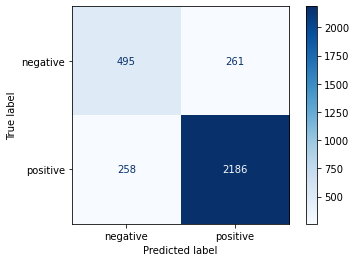

In [60]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(MNB, X_test, Y_test,
                        display_labels=['negative','positive'],
                        cmap=plt.cm.Blues)

In [61]:
token.tokenize(" ".join(['I', "didn't", 'like_NEG', 'this_NEG', 'movie_NEG', '.', 'It', 'was', 'bad', '.']))

['I', 'didn', 't', 'like_NEG', 'this_NEG', 'movie_NEG', 'It', 'was', 'bad']